**Megan Rochella - 0706022210028**

**PIMA Indians Diabetes Database**

In [137]:
import pandas as pd
from pandas import read_csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import necessary library

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/mrochella/datamining/refs/heads/main/diabetes.csv')
df.head(10)

# Import dataset to pandas and show top 10 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [139]:
df.info()

# As we can see from the info, the total of the data are 768, total of columns are 9, and no missing values
# Data types are int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [140]:
description = df.describe()

description
# The code calculates the count of non-null entries, the mean (average) values, standard deviation (showing how spread out the data is),
# and the minimum, maximum, and quartiles (25%, 50%, 75%).

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [141]:
df.isnull().sum()

# Checks whether there is still a null value in each column which there are none (0)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


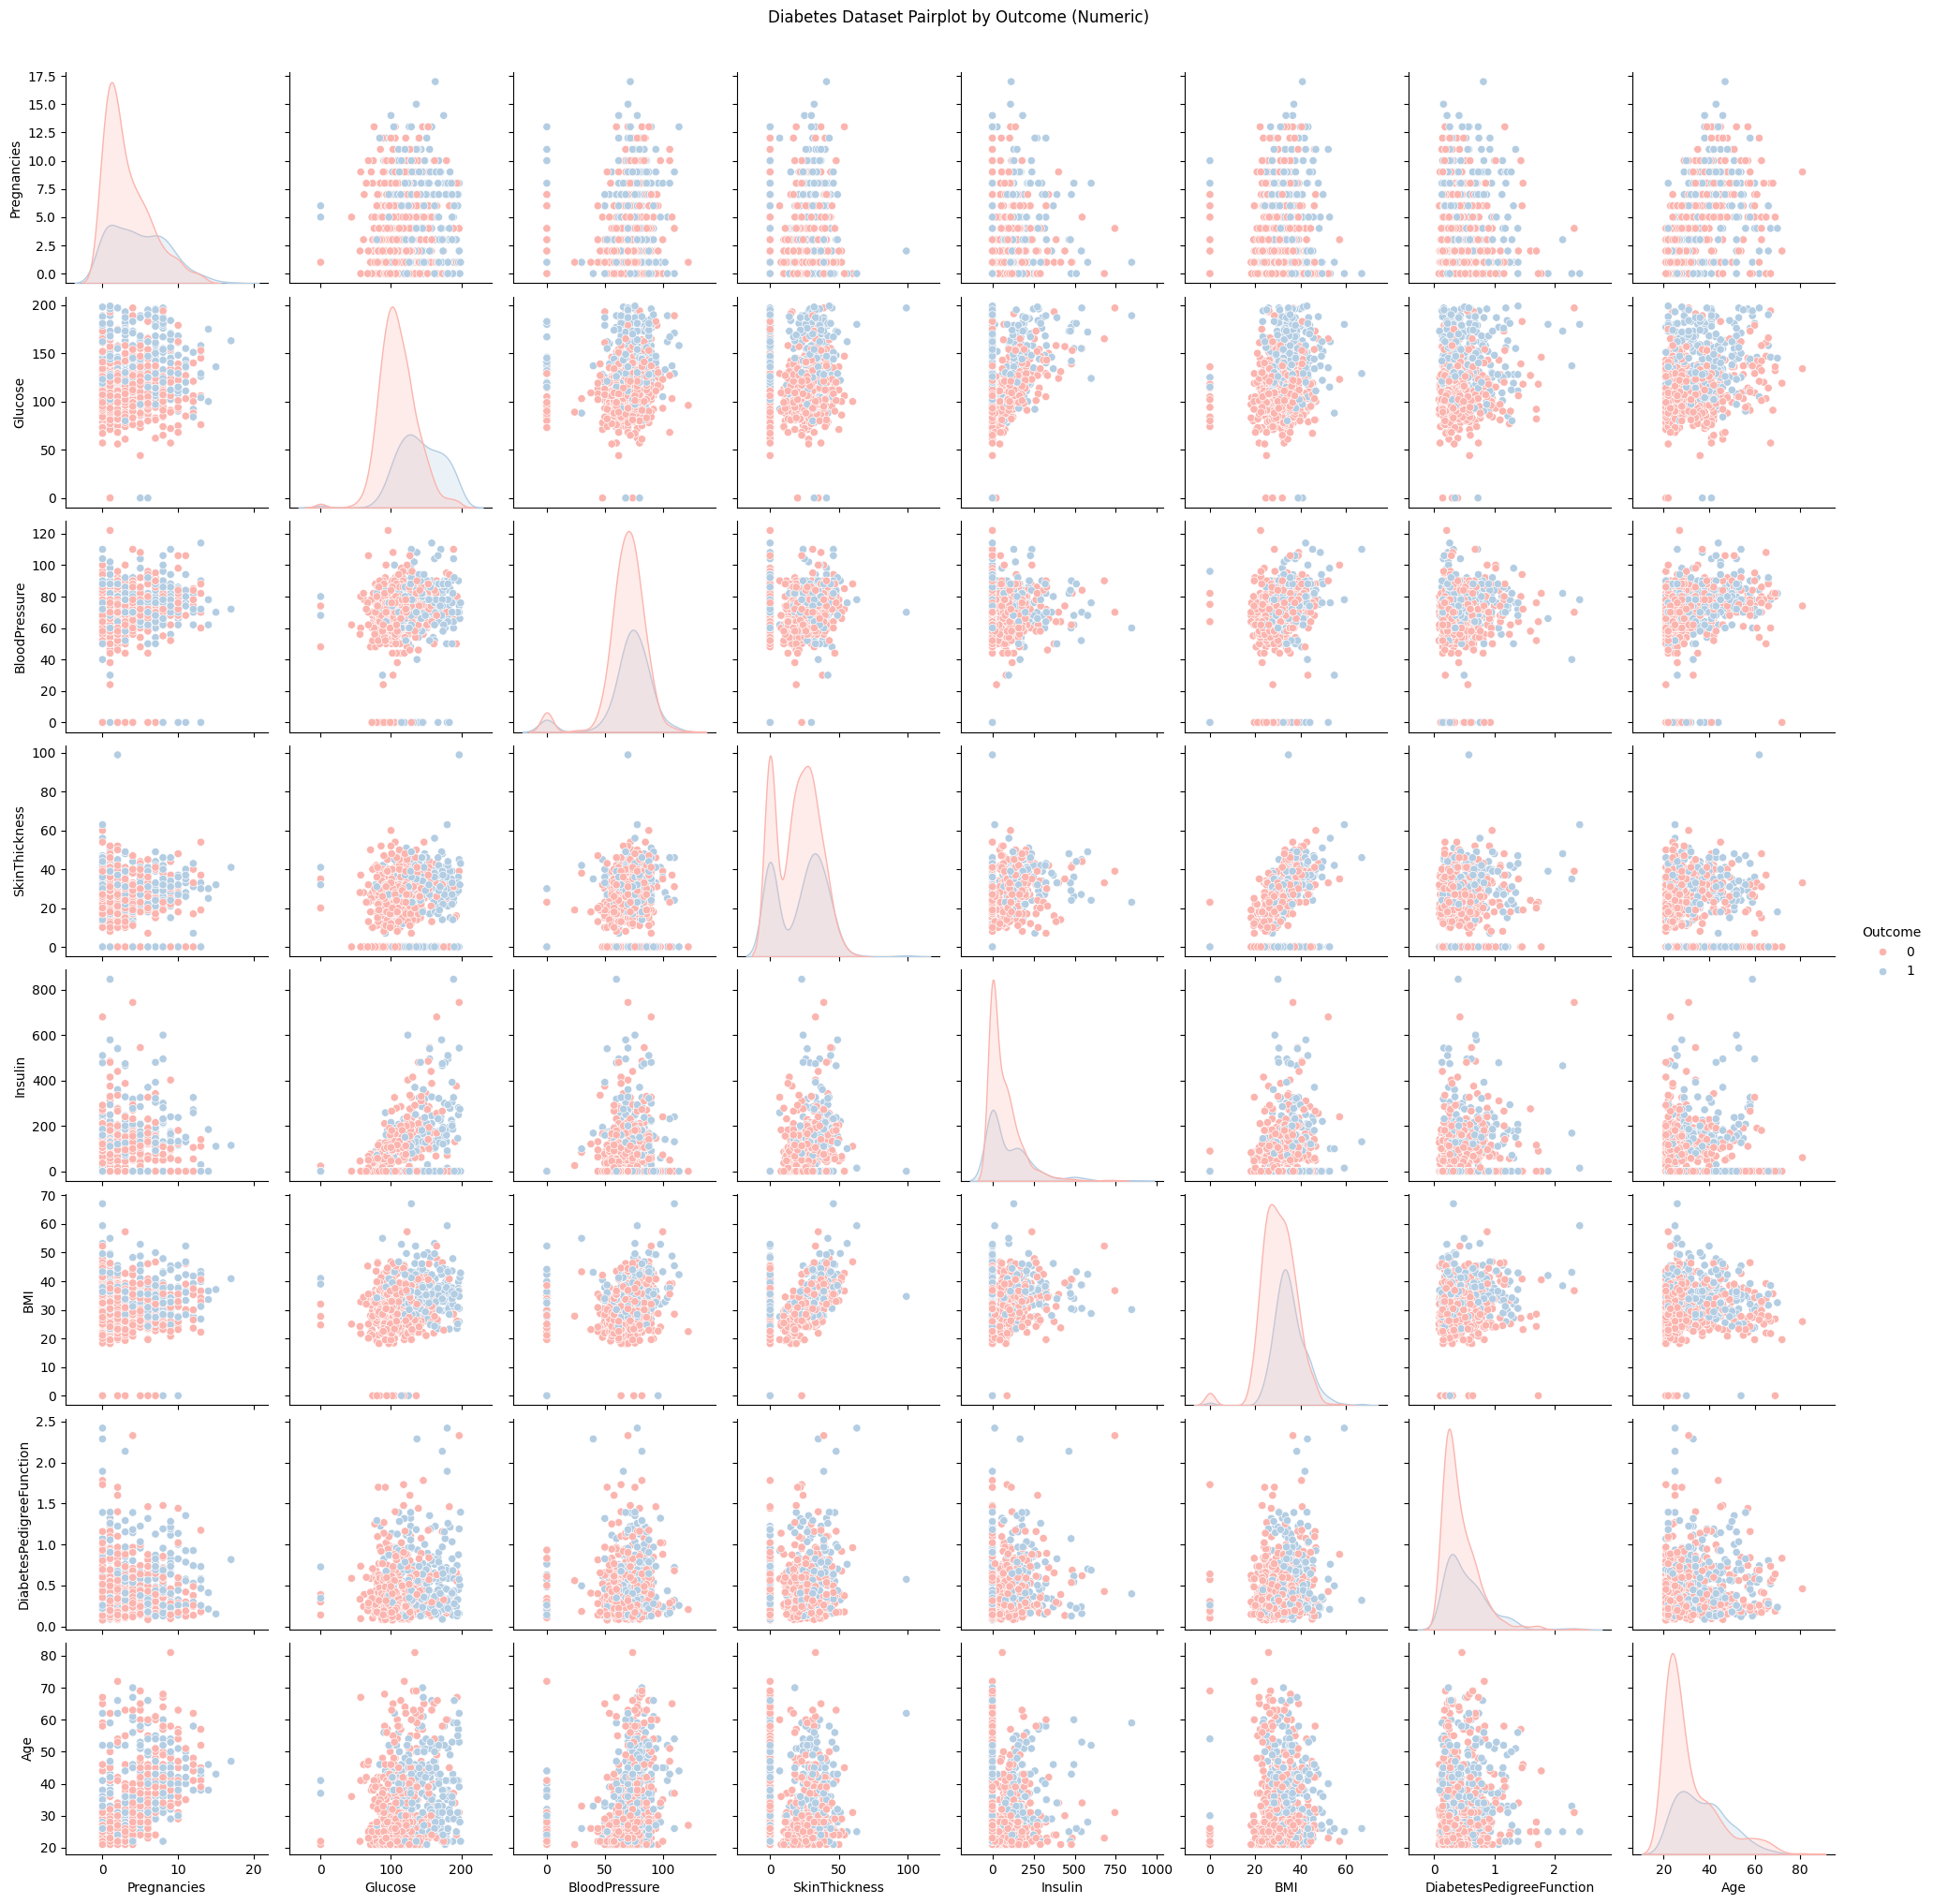

In [142]:
sns.pairplot(df, hue='Outcome', palette='Pastel1', diag_kind='kde')
plt.suptitle("Diabetes Dataset Pairplot by Outcome (Numeric)", y=1.02)

plt.show()
# As we can see from the pairplot visualization below, the higher the glucose level, the higher the risk of having diabetes will be too.

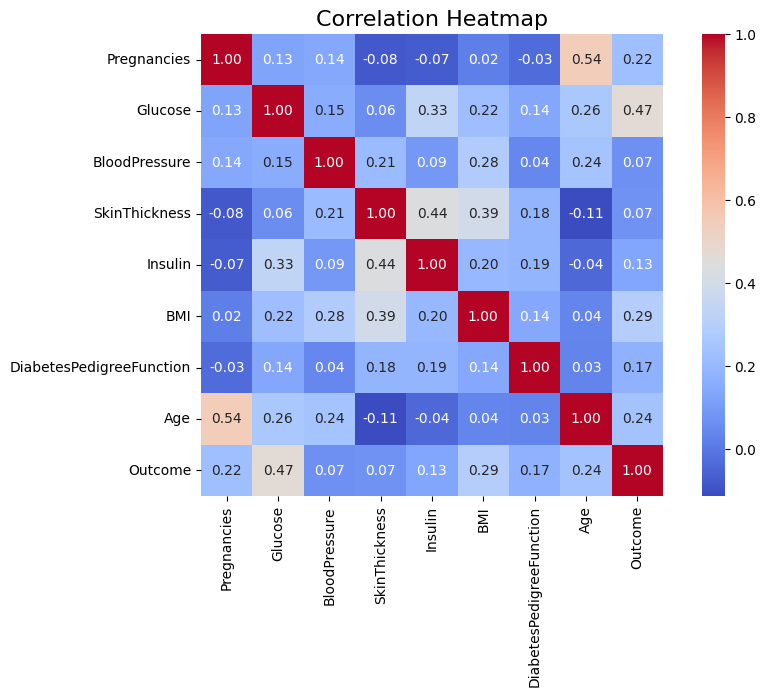

In [143]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)

plt.show()
# Glucose is the strongest predictor of diabetes (0.47) in this dataset. This says that higher glucose levels are associated with a higher likelihood of a diabetes-positive outcome.
# While it is not relevant, the result also suggests that as the age of individuals increases, they tend to have had more pregnancies. (0.54)
# Age have moderate relationships with the diabetes outcome (0.24). Indicating that as age increases, there is a slight increase in the likelihood of having diabetes.
# The weak correlations between other variables (like BloodPressure and SkinThickness) suggest these factors may not be as important for predicting diabetes.

<ipython-input-144-a653445e3194>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')


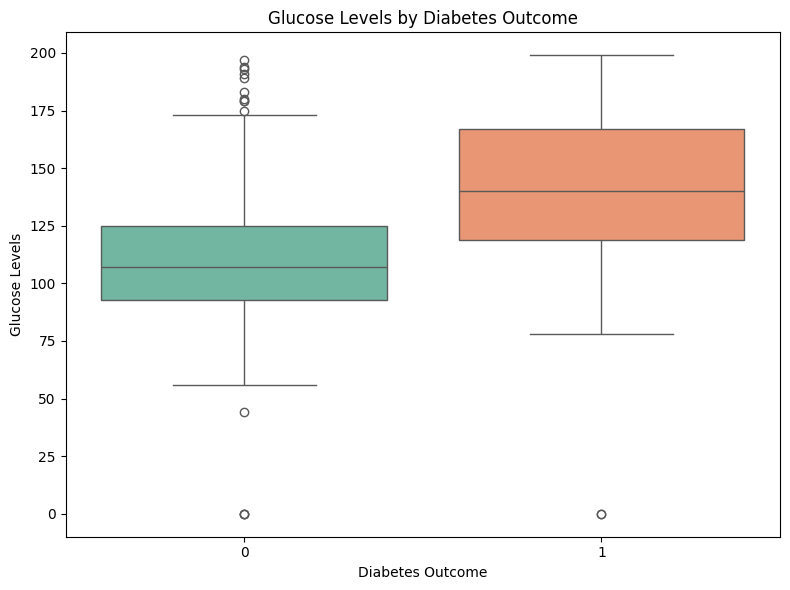

In [144]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Levels')

plt.tight_layout()
plt.show()
# The box plot shows glucose levels by diabetes outcome. It indicates that the average glucose level for people with diabetes is higher than for those without diabetes.
# The box plot also shows that there is more variation in glucose levels among people with diabetes.
# The median glucose level for people with diabetes is about 135, while the median glucose level for those without diabetes is about 100.
# It is also clear that there are some outliers for glucose levels in people without diabetes, while outliers in glucose levels for people with diabetes are less pronounced.

In [145]:
X = df.drop(['Outcome'], axis = 1) # This line creates a new DataFrame X by removing the column labeled 'Outcome' from the original DataFrame.
y = df['Outcome'] # This column typically represents the target variable or label that the model will learn to predict based on the features in X.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# It splits the feature set X and the target variable y into training and testing subsets.
# The 20% of the data will be used for testing, while 80% will be used for training.

X_train.shape, X_test.shape
# 'shape' method is used to check how many rows and columns are associated with each train or test data
# X_train has 614 rows/data and 8 columns for training data
# X_test has 154 rows/data and 8 columns for testing data

((614, 8), (154, 8))

## Decision Tree

## 1. Criterion Entropy

In [147]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [148]:
y_pred_en = clf_en.predict(X_test)
# Predicting the 'X_test' using Criterion Entropy

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
# Shows the accuracy score based on the y_test and y_pred
# Resulting with a high 76% accuracy

Model accuracy score with criterion entropy: 0.7662


In [149]:
y_train_en = clf_en.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.7662
Training set score: 0.7752


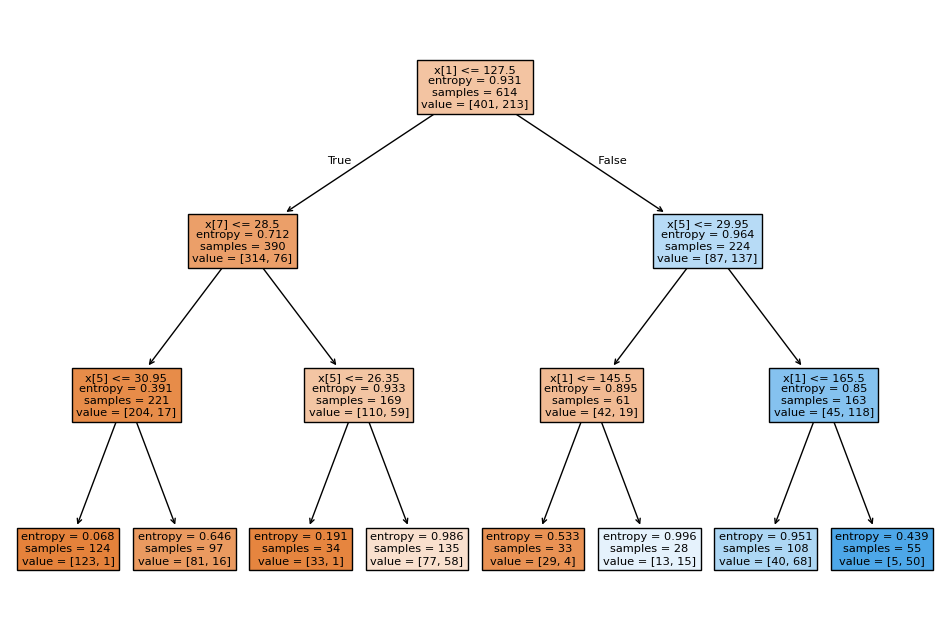

In [150]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, filled=True)

plt.show()
# Creates the decision tree of the Criterion Entropy algorithm using matplotlib

## 2. Gini Index

In [151]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [152]:
y_pred_gini = clf_gini.predict(X_test)
# Predicts the 'X_test' using Criterion Gini

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 75% accuracy

Model accuracy score with criterion gini index: 0.7597


In [153]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.7597
Training set score: 0.7769


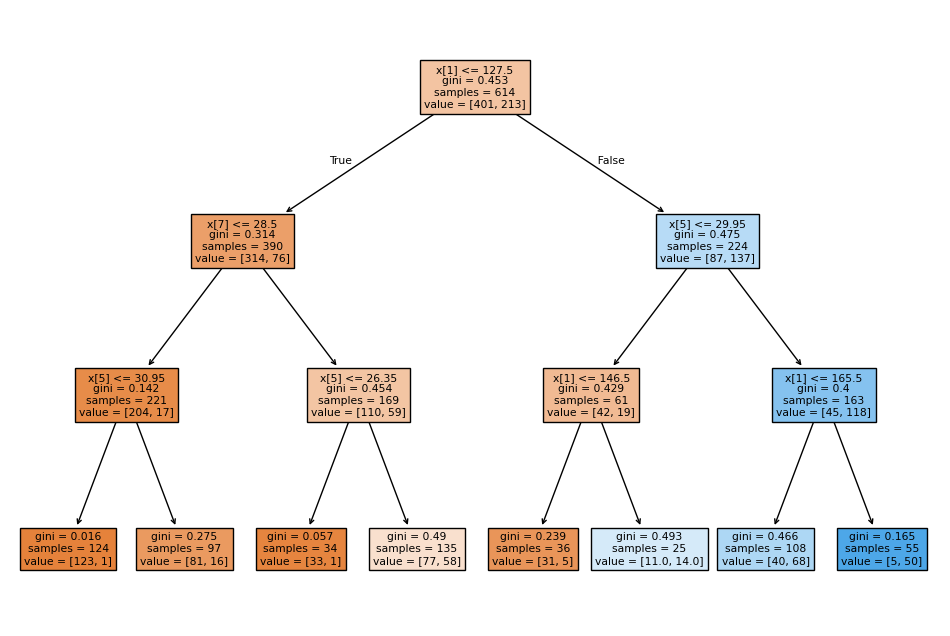

In [154]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True)

plt.show()
# Creates the decision tree of the Criterion gini algorithm using matplotlib

## 3. Naive Bayes

In [155]:
nb = GaussianNB()
nb.fit(X_train, y_train)
# Modelling using Naive Bayes Classifier

GaussianNB()

In [156]:
y_pred_nb = nb.predict(X_test)
# Predicts the 'X_test' using the Naive Bayes Classifier model

In [157]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Model accuracy score: {accuracy_nb:.4f}")
# Shows the accuracy score based on the 'y_test' and 'y_pred'
# Resulting with a high 76% accuracy

Model accuracy score: 0.7662


In [158]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 1%, so we conclude that the model is well-fitted

Testing set score: 0.7662
Training set score: 0.7524


## 4. KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

k = 15
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# Modelling using KNN
# Using k = 15 because it is the nearest neighbor
# And then predicts the 'X_test' using the KNN

In [160]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Model accuracy score: {accuracy_knn:.4f}")
# Prints accuracy score of KNN which is 75%

Model accuracy score: 0.7597


In [161]:
y_train_knn = knn.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_knn)
training_accuracy = accuracy_score(y_train, y_train_knn)

print('Testing set score: {0:0.4f}'.format(test_accuracy))
print('Training set score: {0:0.4f}'.format(training_accuracy))
# The margin is only less than 5%, so we conclude that the model is well-fitted

Testing set score: 0.7597
Training set score: 0.7850


## Conclusion

In [162]:
mat_entropy = confusion_matrix(y_test, y_pred_en)
mat_gini = confusion_matrix(y_test, y_pred_gini)
mat_nb = confusion_matrix(y_test, y_pred_nb)
mat_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(mat_entropy)
# Shows confusion matrix of the Criterion Entropy

print("\nConfusion Matrix Gini:")
print(mat_gini)
# Shows confusion matrix of the Gini Index

print("\nConfusion Matrix Naive Bayes:")
print(mat_nb)
# Shows confusion matrix of the Naive Baiyes

print("\nConfusion Matrix KNN:")
print(mat_knn)
# Shows confusion matrix of the KNN

Confusion Matrix Entropy:
[[83 16]
 [20 35]]

Confusion Matrix Gini:
[[83 16]
 [21 34]]

Confusion Matrix Naive Bayes:
[[79 20]
 [16 39]]

Confusion Matrix KNN:
[[84 15]
 [22 33]]


In [163]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))
# Classification report of the Criterion Entropy
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))
# Classification report of the Gini Index
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))
# Classification report of the Naive Bayes
# It shows the precision, recall, f1-score, and support values of the model.

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))
# Classification report of the KNN
# It shows the precision, recall, f1-score, and support values of the model.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


Classification Report Gini
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75  

**All models are showing similar results, with accuracy scores ranging from 0.76 to 0.77.**

**However, they show some variation in terms of precision and recall.**

The models are all showing relatively good accuracy, indicating they are able to predict the outcome of diabetes well.
The models are better at predicting the outcome of diabetes for those who do not have diabetes (class 0) than those who do have diabetes (class 1), as seen by the higher precision and recall scores for class 0.

Specific observations:

- **Entropy**: Has slightly higher precision for class 0 than the other models, indicating it is better at identifying individuals who do not have diabetes. (Accuracy score 77%)
- **Gini**: Shows a slightly higher precision for class 1, suggesting it might be better at identifying individuals with diabetes. (Accuracy score 76%)
- **Naive Bayes**: Has similar performance to Entropy, with slightly better recall for class 1. (Accuracy score 77%)
- **KNN**: Performs similarly to the other models, with slightly lower precision for class 1. (Accuracy score 76%)

Conclusion: Based on these results, The best model to choose would depend on whether you prioritize identifying those who do not have diabetes (Entropy) or those who do have diabetes (Gini or Naive Bayes).